In [1]:
import pandas as pd
import os
from scipy.stats import spearmanr
import numpy as np
import argparse
from matplotlib import pyplot as plt
import seaborn as sns

In [18]:
result_dir_1014_ablation = "/home/qcx679/hantang/UAAG2/results/Full_mask_5_virtual_node_mask_token_atomic_only_mask_diffusion_1014_ablation_variational_sampling"
benchmarks_1014 = os.listdir(result_dir_1014_ablation)
result_dir_1017_ablation = "/home/qcx679/hantang/UAAG2/results/Full_mask_5_virtual_node_mask_token_atomic_only_mask_diffusion_1017_ablation_variational_sampling"
benchmarks_1017 = os.listdir(result_dir_1017_ablation)
result_dir_orig = "/home/qcx679/hantang/UAAG2/results/Full_mask_5_virtual_node_mask_token_atomic_only_mask_diffusion_0917_variational_size"
benchmarks = os.listdir(result_dir_orig)

In [2]:
result_dir_1025 = "/home/qcx679/hantang/UAAG2/results/Full_mask_5_virtual_node_mask_token_atomic_only_mask_diffusion_1025_variational_sampling"
benchmarks_1025 = os.listdir(result_dir_1025)
# result_dir_1017 = "/home/qcx679/hantang/UAAG2/results/Full_mask_5_virtual_node_mask_token_atomic_only_mask_diffusion_1017_ablation_variational_sampling"
# benchmarks_1017 = os.listdir(result_dir_1017)
result_dir_orig = "/home/qcx679/hantang/UAAG2/results/Full_mask_5_virtual_node_mask_token_atomic_only_mask_diffusion_0917_variational_size"
benchmarks = os.listdir(result_dir_orig)

In [3]:
result_folder = pd.DataFrame({"benchmark_name": [],
                              "model": [],
                              "spearmanr_pred": [],
                              "ndcg_pred": []})

model_list = ["UNAAGI"]
for benchmark in benchmarks_1025:
    benchmark_name = '_'.join(benchmark.split('_')[:2])
    bm_path = os.path.join(result_dir_1025, benchmark)
    result_df = pd.read_csv(os.path.join(bm_path, "results.csv"))
    for model in model_list:
        spr = result_df[result_df['model'] == model]['spearmanr_pred'].values[0]
        ndcg = result_df[result_df['model'] == model]['ndcg_pred'].values[0]
        result_folder = pd.concat([result_folder, pd.DataFrame({"benchmark_name": [benchmark_name],
                                                                "model": ['UNAAGI_1025'],
                                                                "spearmanr_pred": [spr],
                                                                "ndcg_pred": [ndcg]})], ignore_index=True)
        

# for benchmark in benchmarks_1017:
#     benchmark_name = '_'.join(benchmark.split('_')[:2])
#     bm_path = os.path.join(result_dir_1017_ablation, benchmark)
#     result_df = pd.read_csv(os.path.join(bm_path, "results.csv"))
#     for model in model_list:
#         spr = result_df[result_df['model'] == model]['spearmanr_pred'].values[0]
#         ndcg = result_df[result_df['model'] == model]['ndcg_pred'].values[0]
#         result_folder = pd.concat([result_folder, pd.DataFrame({"benchmark_name": [benchmark_name],
#                                                                 "model": ['UNAAGI_ablation_1017'],
#                                                                 "spearmanr_pred": [spr],
#                                                                 "ndcg_pred": [ndcg]})], ignore_index=True)
        
for benchmark in benchmarks:
    benchmark_name = '_'.join(benchmark.split('_')[:2])
    bm_path = os.path.join(result_dir_orig, benchmark)
    result_df = pd.read_csv(os.path.join(bm_path, "results.csv"))
    for model in model_list:
        spr = result_df[result_df['model'] == model]['spearmanr_pred'].values[0]
        ndcg = result_df[result_df['model'] == model]['ndcg_pred'].values[0]
        result_folder = pd.concat([result_folder, pd.DataFrame({"benchmark_name": [benchmark_name],
                                                                "model": ['UNAAGI'],
                                                                "spearmanr_pred": [spr],
                                                                "ndcg_pred": [ndcg]})], ignore_index=True)


# uaa_result = pd.DataFrame({
#     "benchmark_name": ['CP2', 'PUMA', 'CP2', 'PUMA', 'CP2', 'PUMA'],
#     "model": ['UNAAGI_ablation_1014', 'UNAAGI_ablation_1014', 'UNAAGI_ablation_1017', 'UNAAGI_ablation_1017', 'UNAAGI', 'UNAAGI'],
#     "spearmanr_pred": [0.2009, 0.1838, 0.1038, 0.147, 0.3307, 0.224],
#     "ndcg_pred": [0, 0, 0, 0, 0, 0]
# })

# result_folder = pd.concat([result_folder, uaa_result], ignore_index=True)

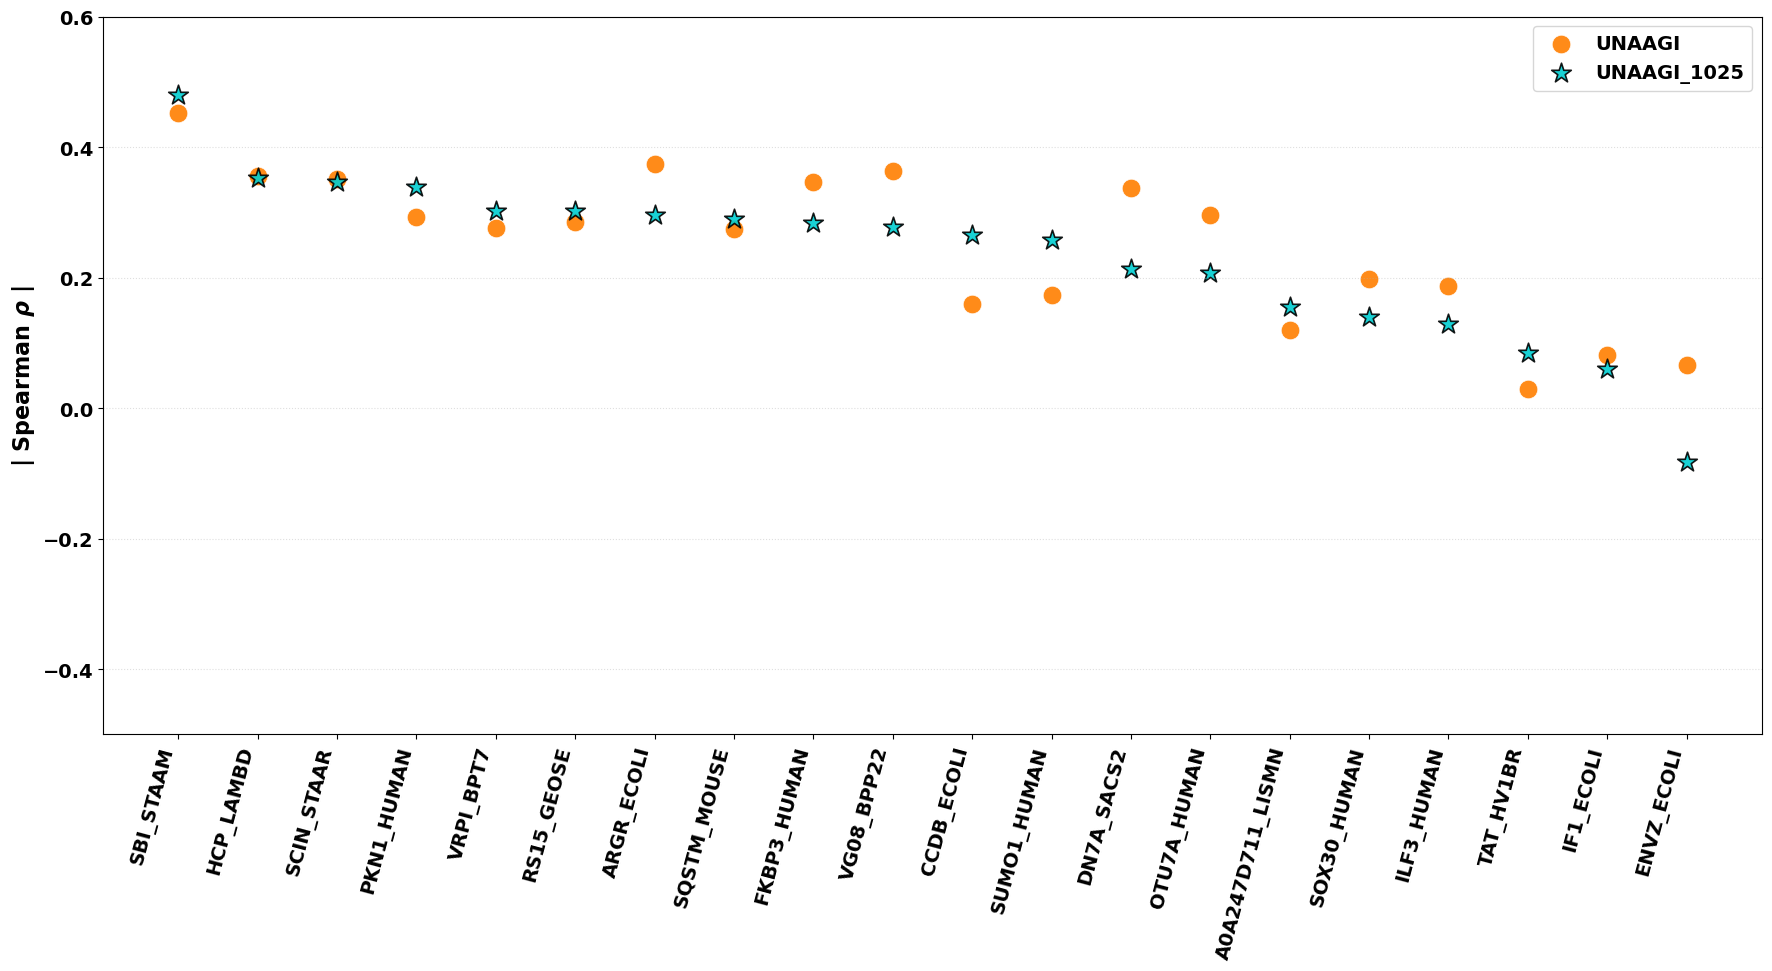

In [4]:

# --- 2) Choose which models to show (3 looks clean like your example) ---
# Put your preferred models here (order = legend order):
models_to_plot = [
    "UNAAGI_ablation_1014",
    "UNAAGI_ablation_1017",
    'UNAAGI',
    'UNAAGI_1025',
]
colors = {
    "UNAAGI_ablation_1014": "black",     # black
    "ProteinMPNN": "#1f78b4",             # dark blue
    "ESM2_3B": "#33a02c",                 # dark green
    "UNAAGI_ablation_1017": "#ff1493",                  # bright red (highlight)
    "UNAAGI": "#ff7f00",          # orange
    "Progen2_large": "#6a3d9a",           # purple
    "ESM-IF1": "#666666",
    "UNAAGI_1025": "#00CED1",          # dark turquoise
}


# --- 3) Build a pivot table (rows = benchmark, cols = model) ---
piv = result_folder.pivot_table(index="benchmark_name",
                     columns="model",
                     values="spearmanr_pred")

# Keep only selected models (drop any that are missing):
models_to_plot = [m for m in models_to_plot if m in piv.columns]
assert len(models_to_plot) > 0, "None of the chosen models are present in the data."

# --- 4) Sort benchmarks by the reference model (first in models_to_plot) descending ---
ref_model = models_to_plot[-1]
piv_sorted = piv.sort_values(by=ref_model, ascending=False)

benchmarks = piv_sorted.index.tolist()
x = np.arange(len(benchmarks))

# --- 5) Make the plot: aligned dots on the same x for each benchmark ---
plt.rcParams.update({
    "font.size": 16,       # larger text everywhere
    "font.weight": "bold", # bold text
    "axes.labelweight": "bold",
    "axes.titlesize": 15,  # even larger title
    "axes.titleweight": "bold",
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
})
plt.figure(figsize=(18, 10))

for m in models_to_plot:
    if m == ref_model:
        y = piv_sorted[m].values
        plt.scatter(
            x, y, marker="*",
            s=220,
            alpha=0.9,
            label=m,
            edgecolor="black",
            linewidth=1.2,
            color=colors.get(m, None)  # fallback to Matplotlib default if not specified
        )
    else:
        y = piv_sorted[m].values
        plt.scatter(
            x, y,
            s=180,
            alpha=0.9,
            label=m,
            edgecolor="white",
            linewidth=0.6,
            color=colors.get(m, None)  # fallback to Matplotlib default if not specified
        )

# --- 6) Cosmetics like the example ---
plt.xticks(x, benchmarks, rotation=75, ha="right")
plt.ylabel(r"| Spearman $\rho$ |")
plt.ylim(-0.5, 0.6)  # adjust if you like
plt.grid(axis="y", linestyle=":", alpha=0.4)
plt.legend(title="", frameon=True, loc="upper right")
plt.tight_layout()
# Save as high-resolution SVG
# plt.savefig("UNAAGI_proteingym_atomic.svg", format="svg", dpi=300)
plt.show()




plt.show()
